In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
train_df=pd.read_csv('D:/UCI_HAR_Dataset/train.csv')
test_df=pd.read_csv('D:/UCI_HAR_Dataset/test.csv')

# overview of dataset:

In [105]:
#train_df.info()
print('train dataset size:',test_df.shape)
train_df.head()

train dataset size: (2947, 563)


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

# Checking the database for null values:

In [106]:
print('null values:',train_df.isnull().values.sum())
train_df.dtypes

null values: 0


tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

# Checking the database for duplicates

In [107]:
print('Number of duplicates in train set:{}'.format(sum(train_df.duplicated())))
print('Number of duplicates in test set:{}'.format(sum(test_df.duplicated())))
#print('Duplicated data',train_df.duplicated().values.sum())

Number of duplicates in train set:0
Number of duplicates in test set:0


In [108]:
train_df['subject'].groupby(train_df['subject']).count()

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

In [109]:
train_df['subject'].groupby(train_df['Activity']).value_counts()

Activity          subject
LAYING            21         90
                  19         83
                  28         80
                  26         76
                  27         74
                             ..
WALKING_UPSTAIRS  5          47
                  21         47
                  22         42
                  8          41
                  19         40
Name: subject, Length: 126, dtype: int64

In [110]:
# .size() and .count() provide the same answer
train_df['Activity'].groupby(train_df['Activity']).size()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

# Check for data imbalance:

In [111]:
px.pie(train_df,names='Activity',title='Activity in database')

In [112]:
px.histogram(data_frame=train_df,x='subject',color='Activity',barmode='group',title='Histogram of data in train set')

In [113]:
px.histogram(data_frame=test_df,x='subject',color='Activity',barmode='group',title='Histogram of data in test set')

# Data exploration

<AxesSubplot:>

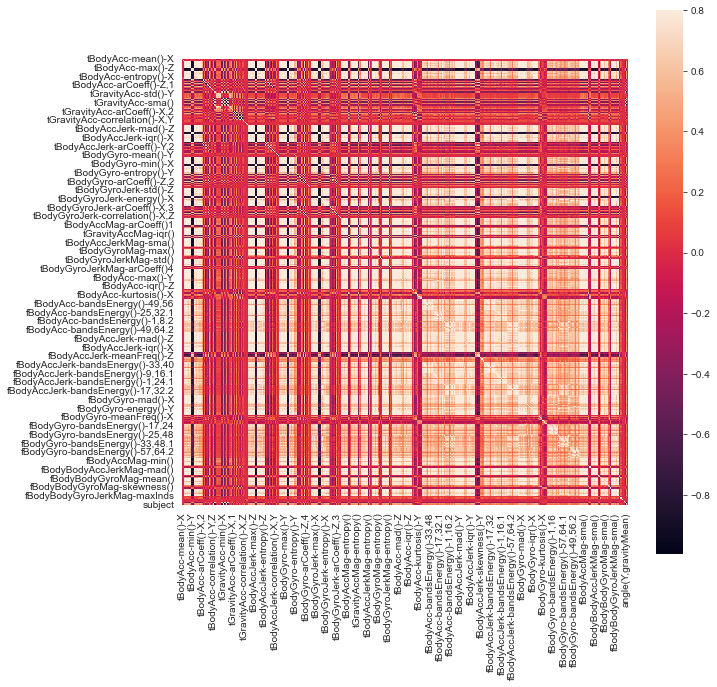

In [114]:
corrmat=train_df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [115]:
px.histogram(train_df,x='tBodyAccMag-mean()',color='Activity')


In [116]:
px.box(train_df, x='Activity',y='tBodyAccMag-mean()')

# PCA

In [117]:
from sklearn import preprocessing
X=train_df.drop('Activity',axis=1)
Y=train_df['Activity']
print('X matrix size:',X.shape)
X=preprocessing.StandardScaler().fit(X).transform(X)
#X
X_test=test_df.drop('Activity',axis=1)
X_t=preprocessing.StandardScaler().fit(X_test).transform(X_test)

X matrix size: (7352, 562)


Text(0, 0.5, 'explained variance')

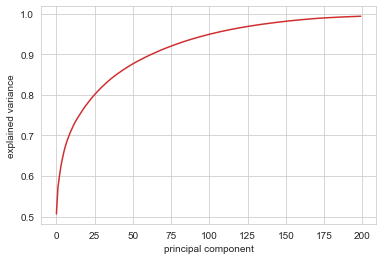

In [118]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=200).fit(X)   # number of components
principal_component=pca.transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal component')
plt.ylabel('explained variance')

In [119]:
principal_component=PCA(n_components=200).fit_transform(X)
X_test_pca=pca.transform(X_t)
#,columns=['Comp1','Comp2','Comp3']
pca_df=pd.DataFrame(data=principal_component)
pca_test_d=pd.DataFrame(data=X_test_pca)
pca_df.head()
pca_df.shape

(7352, 200)

In [121]:
import plotly.express as px
px.scatter(x=pca_df[3],y=pca_df[2],color=train_df['Activity'])

# Apply t-sne on data
Now let use t-SNE which is a non-linear dimentionaily reduction and visualization method to visualize our high dimentional data:

In [122]:
from sklearn.manifold import TSNE
import seaborn as sns

In [123]:
# perform t-sne with different preplexities and their plots
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.047s
[t-SNE] Iteration 50: error = 114.0798721, gradient norm = 0.0216503 (50 iterations in 1.502s)
[t-SNE] Iteration 100: error = 97.6794281, gradient norm = 0.0167729 (50 iterations in 

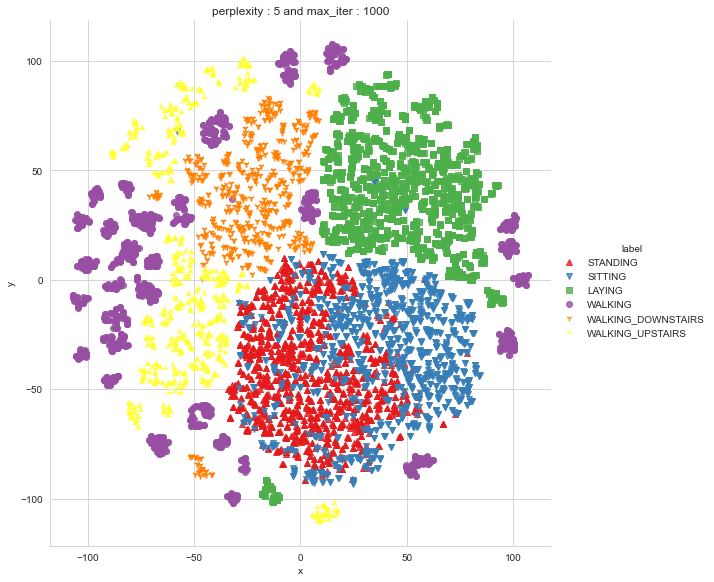

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.080s
[t-SNE] Iteration 50: error = 105.6269531, gradient norm = 0.0212185 (50 iterations in 1.479s)
[t-SNE] Iteration 100: error = 90.2659912, gradient norm = 0.0105785 (50 iteratio

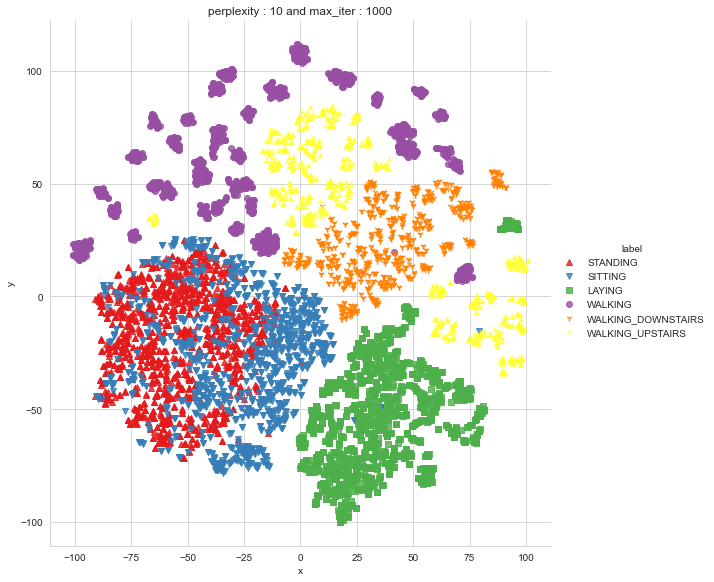

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 1.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.141s
[t-SNE] Iteration 50: error = 97.7466202, gradient norm = 0.0136014 (50 iterations in 1.855s)
[t-SNE] Iteration 100: error = 84.0316620, gradient norm = 0.0080888 (50 iteration

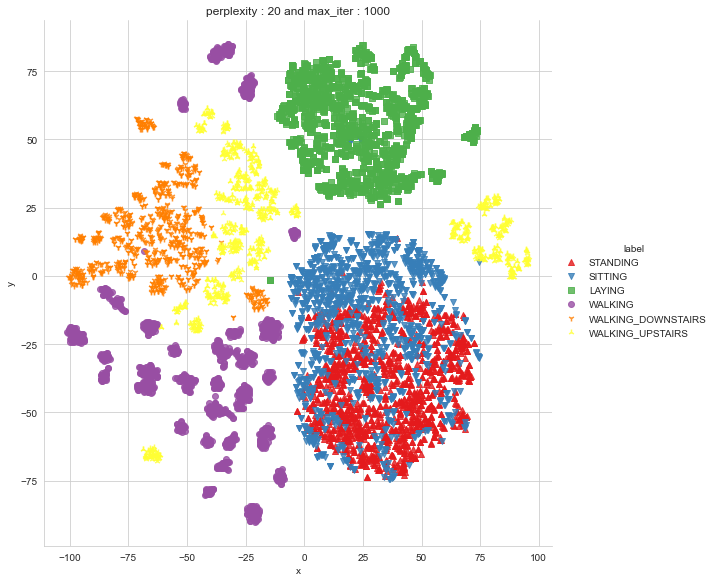

Done


In [124]:
X_pre_tsne = train_df.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train_df['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

# 
Now with the knowledge we have we can go on using different classification techniques to classify the data. we will use:

1) Existing method using logestic regression

2) Proposed method using SVM Classifier


# Existing Method using Logistic regression:

In [125]:
X_train=train_df.drop('Activity',axis=1)
Y_train=train_df['Activity']
X_test=test_df.drop('Activity',axis=1)
Y_test=test_df['Activity']

In [126]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(C=0.01,solver='liblinear')
lr_clf.fit(X_train,Y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [127]:
from sklearn.metrics import classification_report,accuracy_score
y_hat=lr_clf.predict(X_test)
print('accuracy score(test data): \n',accuracy_score(Y_test,y_hat))
print('Classification report(test dataset): \n',classification_report(Y_test,y_hat))

accuracy score(test data): 
 0.9409569053274517
Classification report(test dataset): 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.83      0.88       491
          STANDING       0.87      0.94      0.90       532
           WALKING       0.93      0.99      0.96       496
WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



# Confusion matrix

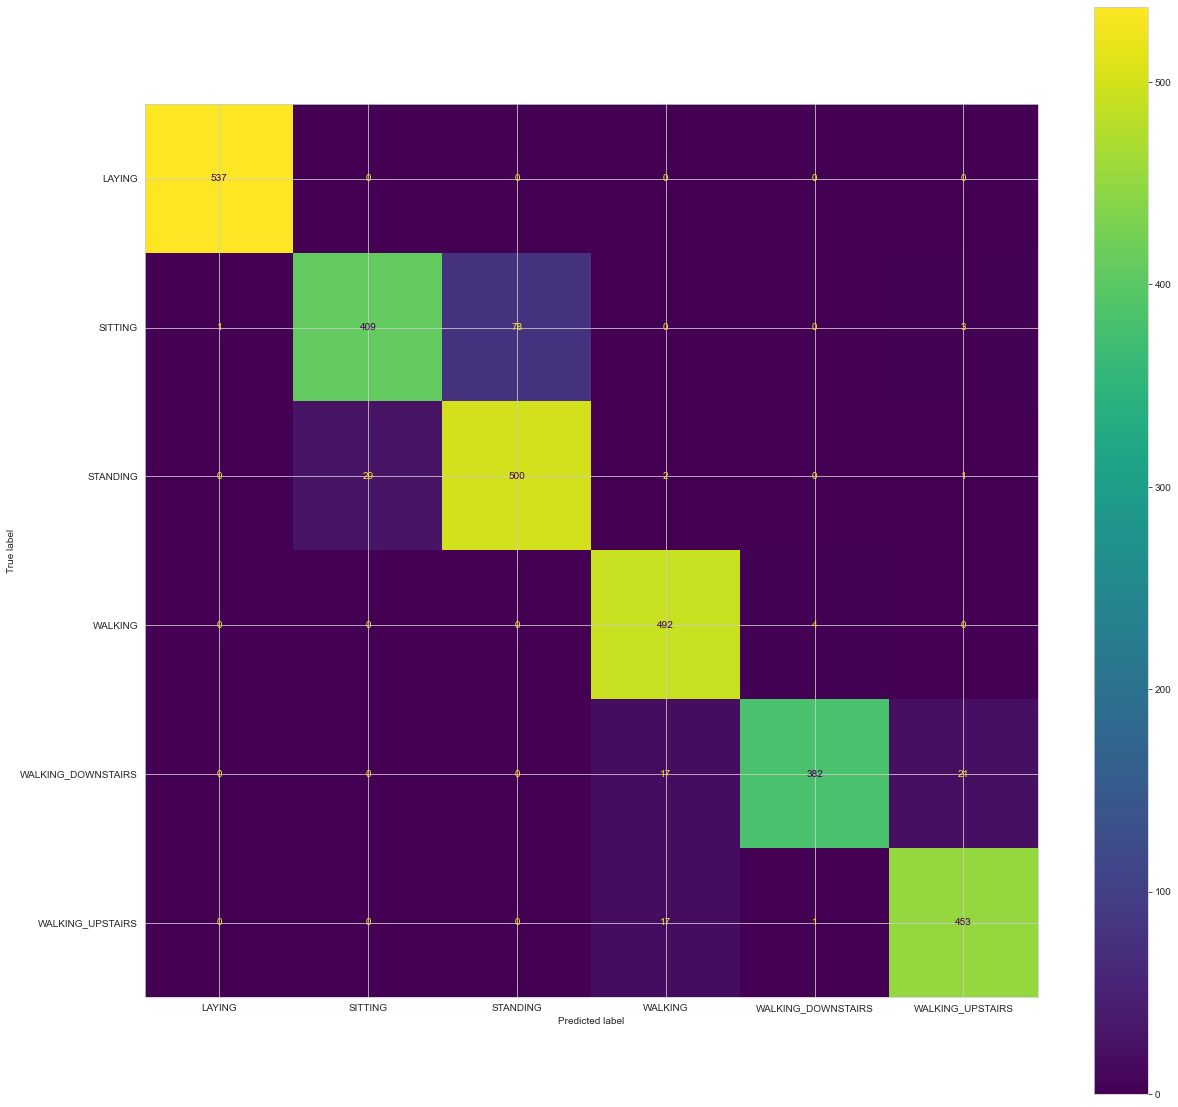

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_hat, labels=lr_clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_clf.classes_)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)

# Support Vector Machine:

In [129]:
from sklearn import svm
#SVM kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm_clf=svm.SVC(kernel='rbf')
svm_clf.fit(X_train,Y_train)
y_hat=svm_clf.predict(X_test)
print('SVM accuracy score (test data):\n',accuracy_score(Y_test,y_hat))
print('SVM classification report (test data): \n',classification_report(Y_test,y_hat))

SVM accuracy score (test data):
 0.9307770614183916
SVM classification report (test data): 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.90      1.00      0.94       496
WALKING_DOWNSTAIRS       0.99      0.85      0.92       420
  WALKING_UPSTAIRS       0.94      0.95      0.94       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



#  Confusion matrix

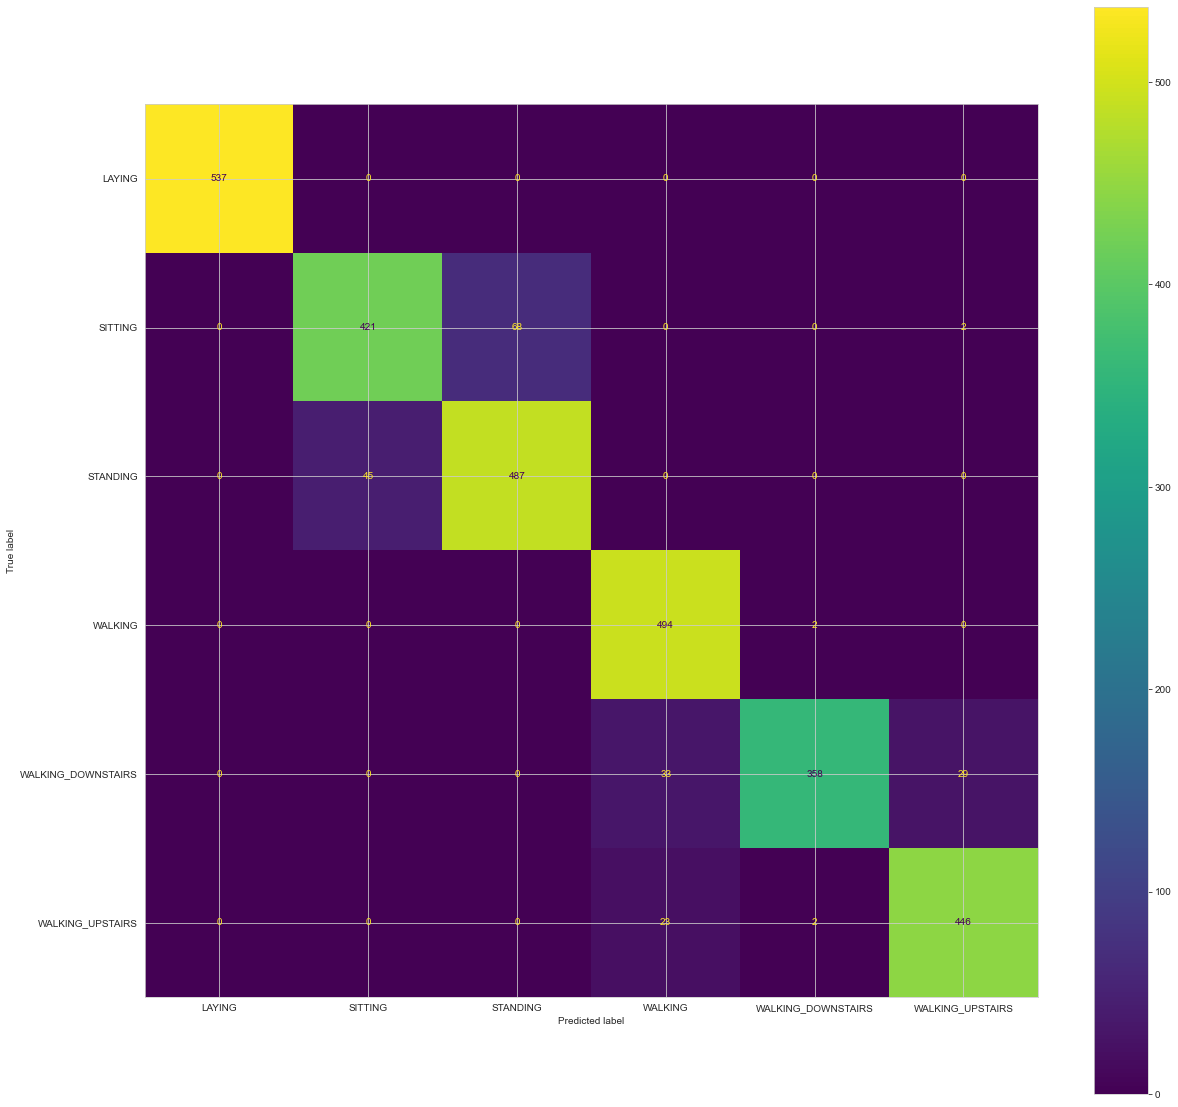

In [130]:
cm = confusion_matrix(Y_test,y_hat, labels=svm_clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_clf.classes_)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)

In [131]:
# https://github.com/rcmalli/keras-vggface
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\admin\appdata\local\temp\pip-req-build-dz3k0s0i


  Running command git clone -q https://github.com/rcmalli/keras-vggface.git 'C:\Users\admin\AppData\Local\Temp\pip-req-build-dz3k0s0i'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/rcmalli/keras-vggface.git 'C:\Users\admin\AppData\Local\Temp\pip-req-build-dz3k0s0i'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [136]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [137]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:/"))

# Any results you write to the current directory are saved as output.

['$RECYCLE.BIN', '72075', 'faces', 'LSTM-Human-Activity-Recognition-master', 'LSTM-Human-Activity-Recognition-master.zip', 'System Volume Information', 'test', 'train', 'UCI HAR Dataset.zip', 'UCI_HAR_Dataset', '__MACOSX']


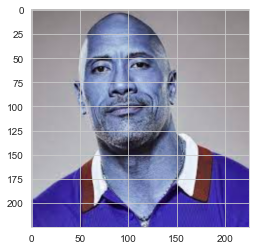

(225, 225, 3)


In [138]:
img = cv2.imread('D:/faces/train/Rock/1.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

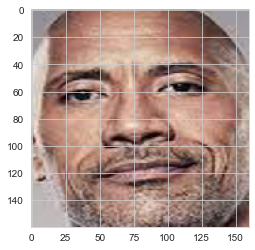

(160, 160, 3)


In [139]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('D:/faces/train/Rock/1.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

# Apply extract_face() for all faces in the dataset

In [140]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('D:/faces/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('D:/faces/test/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('3-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)
        

loaded 15 sample for class: Rock
loaded 12 sample for class: trump
loaded 14 sample for class: william
(41, 160, 160, 3) (41,)
loaded 5 sample for class: Rock
loaded 5 sample for class: trump
loaded 6 sample for class: william
(16, 160, 160, 3) (16,)


In [141]:
# load the face dataset
data = np.load('3-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (41, 160, 160, 3) (41,) (16, 160, 160, 3) (16,)


In [213]:
# Download the Pre-Trained Keras FaceNet Model
wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1' -O 'facenet_keras.h5'

SyntaxError: invalid syntax (Temp/ipykernel_5736/10136776.py, line 2)

In [212]:
# example of loading the keras facenet model
from tensorflow.keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')

OSError: No file or directory found at facenet_keras.h5

In [157]:
from keras.models import load_model
# load the facenet model
facenet_model = load_model('D:/faces/facenet_keras .h5')
#model_path = 'D:/faces/facenet_keras .h5'

print('Loaded Model')

ValueError: bad marshal data (unknown type code)

In [156]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(model_path, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(model_path, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('3-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

AttributeError: 'str' object has no attribute 'predict'

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

In [ ]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

In [159]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [160]:
TRAIN_DIR = ('D:/faces/train/')
TEST_DIR = ('D:/faces/test/')

In [161]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [162]:
IMG_SIZE= (48, 48)

In [163]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.32it/s]

41 images loaded from D:/faces/train/ directory.


In [164]:
train_labels

{0: 'Rock', 1: 'trump', 2: 'william'}

In [165]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.36it/s]

16 images loaded from D:/faces/test/ directory.


In [166]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

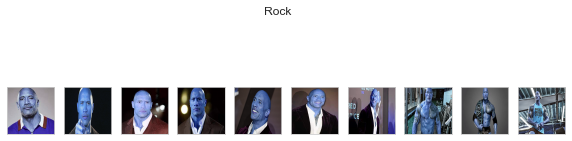

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


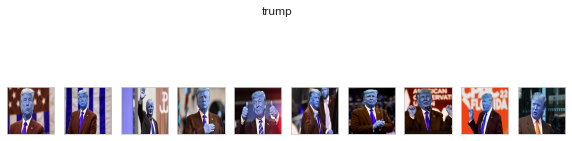

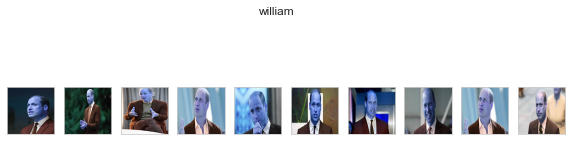

In [167]:
plot_samples(X_train, y_train, train_labels, 10)

In [168]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=6)
Y_train.shape

(41, 6)

In [169]:
Y_test = to_categorical(y_test, num_classes=6)
Y_test.shape

(16, 6)

In [170]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(
        weights=None,
        include_top=False, 
        input_shape=IMG_SIZE + (3,)
    )

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_175 (InputLayer)      [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [171]:
NUM_CLASSES = 6

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation="softmax"))

In [172]:
def deep_model(model, X_train, Y_train, epochs, batch_size):
   
    model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])
    
    history = model.fit(X_train
                       , Y_train
                       , epochs=epochs
                       , batch_size=batch_size
                       , verbose=1)
    return history

In [173]:
epochs = 40
batch_size = 64

history = deep_model(model, X_train, Y_train, epochs, batch_size)

Train on 41 samples
Epoch 1/40
41/41 [==============================] - 2s 60ms/sample - loss: 0.6930 - acc: 0.8333
Epoch 2/40
41/41 [==============================] - 2s 42ms/sample - loss: 0.6823 - acc: 0.8333
Epoch 3/40
41/41 [==============================] - 2s 41ms/sample - loss: 0.4470 - acc: 0.8333
Epoch 4/40
41/41 [==============================] - 2s 46ms/sample - loss: 1.3455 - acc: 0.7846
Epoch 5/40
41/41 [==============================] - 2s 42ms/sample - loss: 0.4495 - acc: 0.8171
Epoch 6/40
41/41 [==============================] - 2s 45ms/sample - loss: 0.3988 - acc: 0.8374
Epoch 7/40
41/41 [==============================] - 2s 44ms/sample - loss: 0.3780 - acc: 0.8211
Epoch 8/40
41/41 [==============================] - 2s 40ms/sample - loss: 0.3467 - acc: 0.8293
Epoch 9/40
41/41 [==============================] - 2s 43ms/sample - loss: 0.3401 - acc: 0.8049
Epoch 10/40
41/41 [==============================] - 2s 39ms/sample - loss: 0.3530 - acc: 0.8008
Epoch 11/40
41/41 [

In [174]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy = 0.38


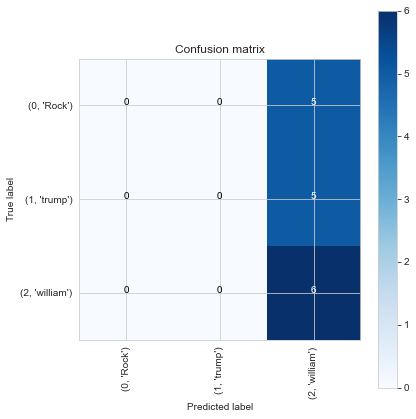

In [175]:
# Validate on test set

predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in predictions]


accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, y_pred) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(test_labels.items()), normalize=False)

In [176]:
from keras.preprocessing.image import ImageDataGenerator

datagen_test = ImageDataGenerator(rescale = 1./255)
pred_generator = datagen_test.flow_from_directory(TEST_DIR,
                                                 target_size = (48,48),
                                                 color_mode = "grayscale",
                                                 batch_size = batch_size,
                                                 class_mode = "categorical",
                                                 shuffle=False)

Found 16 images belonging to 3 classes.


In [177]:
new_predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in new_predictions]
y_pred = [test_labels[k] for k in y_pred]

In [178]:
filenames = pred_generator.filenames
actual_class = [test_labels[h] for h in pred_generator.classes]

In [179]:
import pandas as pd

pred_result = pd.DataFrame({"Filename":filenames,
                           "Predictions":y_pred,
                           "Actual Values":actual_class})

pred_result.head()

Filename Predictions Actual Values
0  Rock\1.jpg     william          Rock
1  Rock\2.jpg     william          Rock
2  Rock\3.jpg     william          Rock
3  Rock\4.jpg     william          Rock
4  Rock\5.jpg     william          Rock

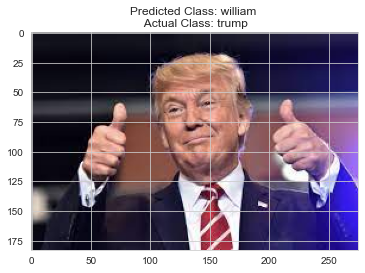

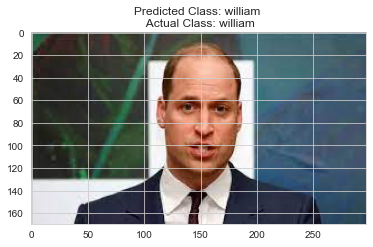

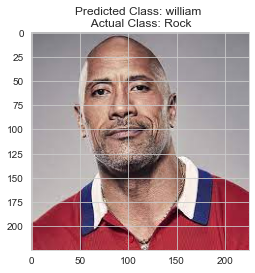

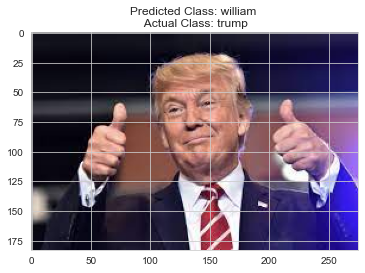

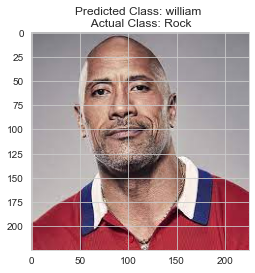

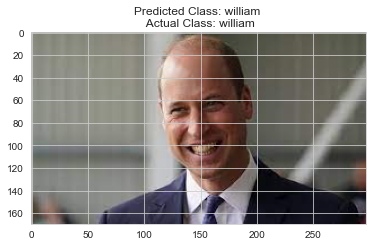

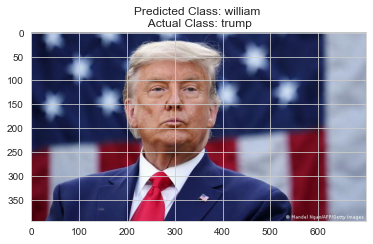

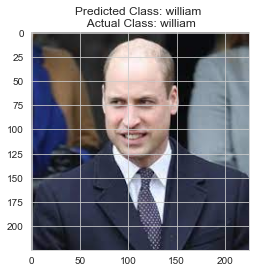

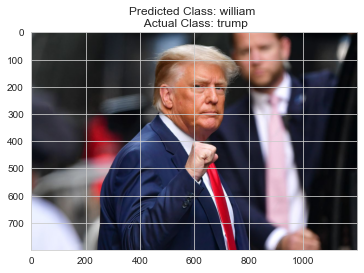

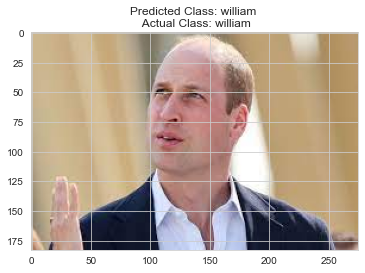

In [180]:
from random import randint

l = len(filenames)
base_path = TEST_DIR
for i in range(10):  # 10 images
    
    rnd_number = randint(0,l-1)
    filename,pred_class,actual_class = pred_result.loc[rnd_number]
    
    img_path = os.path.join(base_path,filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Predicted Class: {} {} Actual Class: {}".format(pred_class,'\n',actual_class))
    plt.show()
    pass

In [202]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


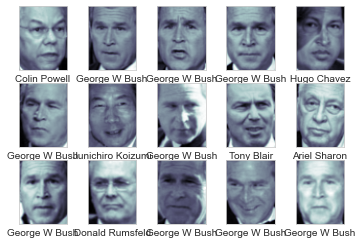

In [203]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [204]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [205]:
 from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [206]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 31.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [207]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

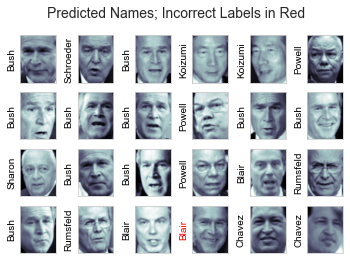

In [208]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [209]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(92.68, 0.5, 'predicted label')

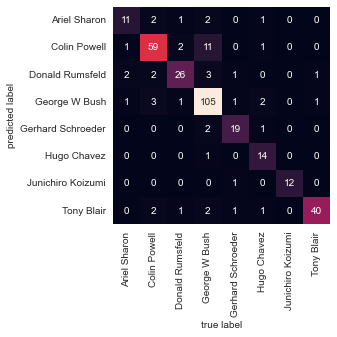

In [210]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')